In [1]:
import numpy as np
import matplotlib.pyplot as plt

# get data
seismic_data = np.genfromtxt("data/ProjectTestDataSet2.txt").astype(np.float32)
seismic_data.shape

(9819,)

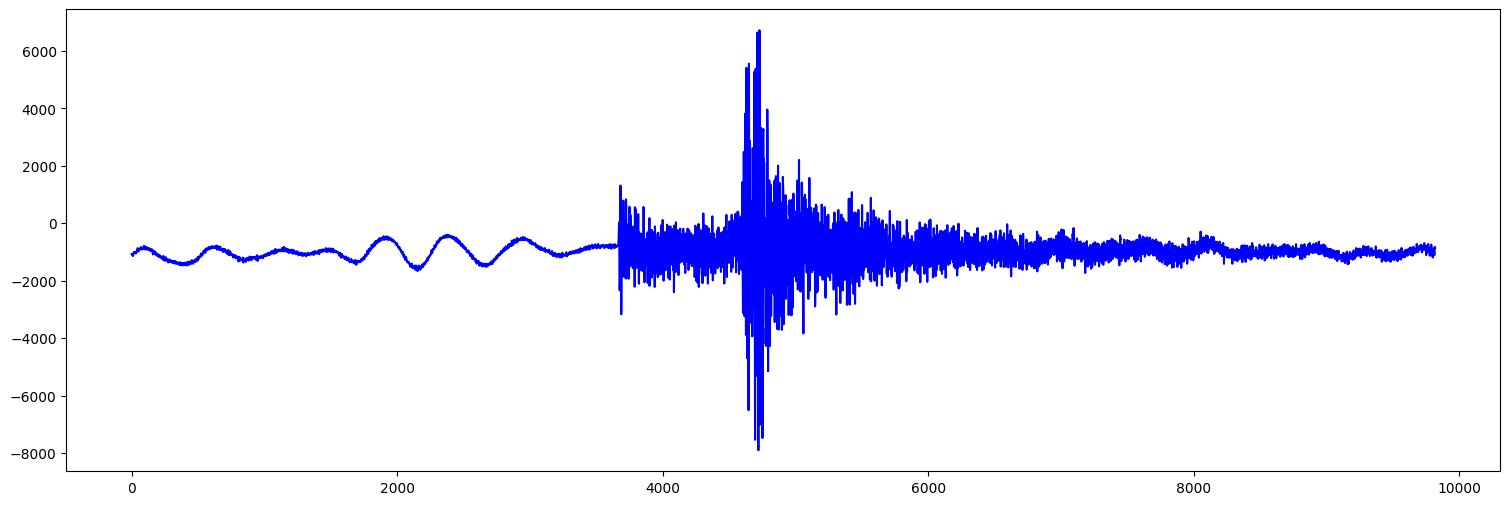

In [2]:
# visualize for good measure
time = [i for i in range(seismic_data.shape[0])]

fig, axs = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(18.5, 6)

plt.plot(time, seismic_data.T, 'b')

In [3]:
from importlib import reload
import CPD.warm

reload(CPD.warm)

<module 'CPD.warm' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\warm.py'>

In [4]:
# put arrays in dictionary for labels
seis_data = {}

seis_data["channel_0"] = seismic_data.T

In [5]:
# warm up for 5 seconds and determine best lags
# (warms up in 9 seconds)
fftwarm = CPD.warm.FFTWarm(seis_data, n0=50, chunks=1)
fftwarm.warmup()

['channel_0']
channel_0: Calculated saliency map :)


In [6]:
import CPD.CPD
reload(CPD.CPD)

<module 'CPD.CPD' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\CPD.py'>

In [7]:
cpd_earth = CPD.CPD.Online(fftwarm, k=1, p=0.8)

TypeError: Online.__init__() got an unexpected keyword argument 'p'

In [9]:
change_points = cpd_earth.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")
# AIMING FOR cp = ???

STEP 5
STEP 6
channel_0 rejection incremented 1
STEP 7
channel_0 rejection incremented 2
STEP 8
channel_0 resetting rejection
STEP 9
channel_0 rejection incremented 1
STEP 10
channel_0 rejection incremented 2
STEP 11
channel_0 rejection incremented 3
STEP 12
channel_0 rejection incremented 4
STEP 13
channel_0 rejection incremented 5
STEP 14
channel_0 rejection incremented 6
STEP 15
channel_0 rejection incremented 7
STEP 16
channel_0 rejection incremented 8
STEP 17
channel_0 rejection incremented 9
channel_0 detected change point! Halting.
STEP 18
change point detected at t=2176


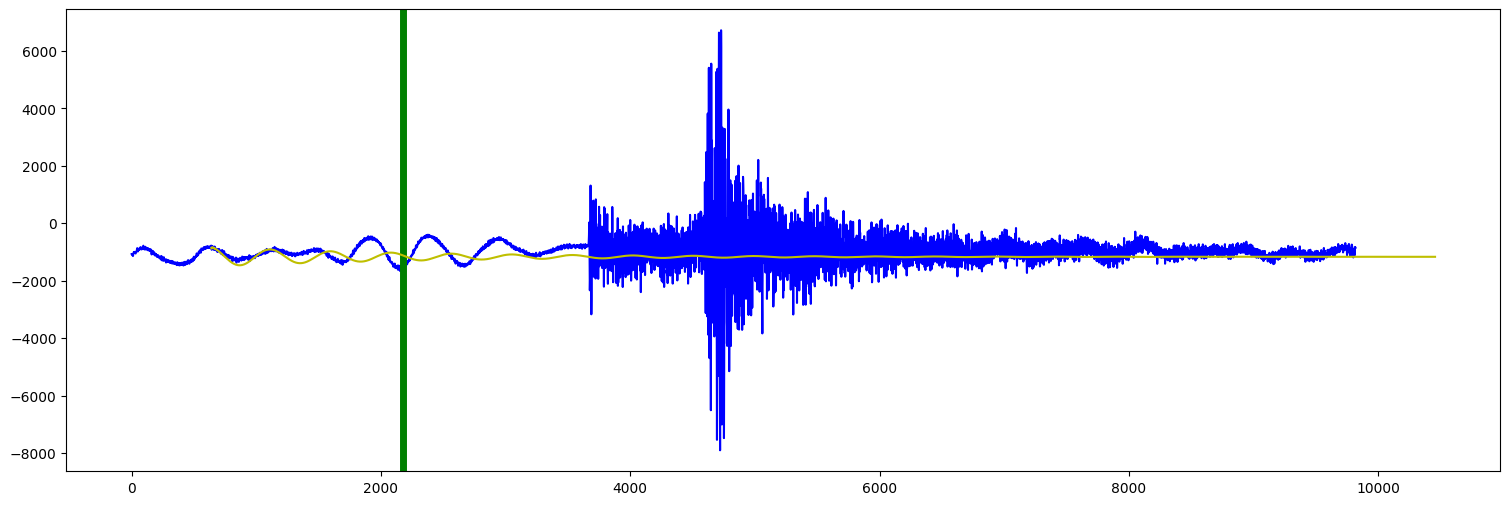

In [ ]:
# visualize for good measure

warmup = 5 * 128

fig, axs = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(18.5, 6)

axs.plot(time, seismic_data.T, 'b')

cpt = change_points["channel_0"]
axs.axvline(x=cpt, c='g', linewidth=5)
